## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# We have 294478 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
# 290584 unique users in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# Dividing the number of users that converted by the total
df.query('converted == 1').user_id.size/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# Looking for the amount of mitmatch between new page and treatment

len(df.query("group != 'treatment' & landing_page == 'new_page'")) + len(df.query("group == 'treatment' & landing_page != 'new_page'"))

3893

f. Do any of the rows have missing values?

In [7]:
# I will add the number of nan values by column
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Extracting the index of the rows where the missmatch happens
index1 = np.concatenate((df.query("group != 'treatment' & landing_page == 'new_page'").index, df.query("group == 'treatment' & landing_page != 'new_page'").index))
index1

array([    22,    240,    490, ..., 293917, 294014, 294252])

In [9]:
# dropping the extracted indexes from our dataframe and creating a new one with these changes
df2 = df.drop(index1, axis=0)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# finding the repeated user through the value count functions which returns the count for unique values in descendant order, 
# so I will only see the first 2.
df2.user_id.value_counts()[:2]

773192    2
630732    1
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
# Extracting the duplicated user by their user id
df2.query('user_id == 773192')


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# Removing the row and chencking again as I did before
df2.drop(1899, axis = 0, inplace=True)
df2.user_id.value_counts()[:3]

630732    1
793302    1
840399    1
Name: user_id, dtype: int64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [20]:
# Querying the amount of converted values and dividing them by the total of values
df2.query("converted == 1").user_id.size/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
# Querying the amount of users in the control group who converted and dividing them by the amount of users in the controls
# group to find the rate and therefore probability
df2.query("group == 'control' & converted == 1").user_id.size/df2.query("group == 'control'").user_id.size

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
# Querying the amount of users in the treatment grou who converted and dividing them by the amount of users in the treatment
# group
df2.query("group == 'treatment' & converted == 1").user_id.size/df2.query("group == 'treatment'").user_id.size

0.11880806551510564

d. What is the probability that an individual received the new page?

In [23]:
# Querying the amount of users that landed in the new page and dividing them by the total of users to find the rate
df2.query("landing_page == 'new_page'").user_id.size/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

So far, there is not sufficient evidence that landing in a new page leads to more conversions. The probabilities for converting, whether it is by landing in the new page or the old page are quite similar. We need to perform further analysis to arrive to a firm conclusion.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

I will consider as my null hypothesis for P_old >= P_new. In other words, I will consider the probability that they converted for the old page to be equal or higher than the new page. 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
# Under the null, both rate should be equal to the global rate of conversion rate of ab_data.csv regardless of the page
p_new = df2.query("converted == 1").user_id.size/df2.shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
# Under the null, both rate should be equal to the global rate of conversion rate of ab_data.csv regardless of the page
p_old = df2.query("converted == 1").user_id.size/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
# Querying the number of users in the treatment group
n_new = df2.query("group == 'treatment'").user_id.size
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
# Querying the number of users in the control group
n_old = df2.query("group == 'control'").user_id.size
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
# We use binomial sampling as we have two options in the simulation with the p_new and n_new previously found
new_page_converted = np.random.binomial(n = 1,p = p_new, size=n_new)
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
# We use binomial sampling as we have two options in the simulation with the p_old and n_old previously found
old_page_converted = np.random.binomial(n = 1,p = p_old, size=n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
# finding the difference of pnew and pold using the values previously found
sim_val = sum(new_page_converted)/len(new_page_converted) - sum(old_page_converted)/len(old_page_converted)
sim_val

-0.0030647127613160352

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted
# p_diffs = []
# for _ in range(10_000):
#     new_page_converted = np.random.binomial(n = 1,p = p_new, size=n_new)
#     old_page_converted = np.random.binomial(n = 1,p = p_old, size=n_old)
#     p_diffs.append(sum(new_page_converted)/len(new_page_converted) - sum(old_page_converted)/len(old_page_converted))
# p_diffs = np.array(p_diffs)
# p_diffs

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

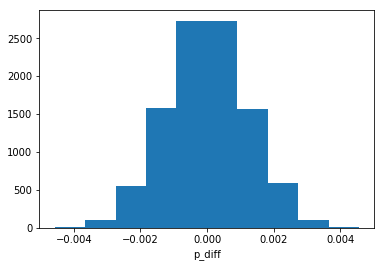

In [32]:
plt.hist(p_diffs)

plt.xlabel('p_diff');

It looks similar to what I expected. Our values are suppose to be around 0 as that is our null hypothesis, and the value which we simulate around.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [118]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [52]:
# Actual difference observed in ab_data.csv
obs_diff =  df2.query("landing_page == 'new_page' & converted == 1").user_id.size/df2.query("landing_page == 'new_page'").user_id.size - df2.query("landing_page == 'old_page' & converted == 1").user_id.size/df2.query("landing_page == 'old_page'").user_id.size
obs_diff

-0.0015782389853555567

In [53]:
# Extracting the p value
(p_diffs > obs_diff).mean()

0.90149999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value I calculated is called the p value, which represents the probability of obtaining results at least as extreme as the the observed results actually observed, under the assumption of the null hypothesis is true.

Assuming an alpha of 0.05, with this value I just obtained (0.9014 have enough evidence to state that our statistic is most likely to come from the null hypothesis. This means that we fail to reject the null hypothesis, in other words, I can affirm that there is not a difference between the new and the old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [36]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' & converted == 1").user_id.size
convert_new = df2.query("landing_page == 'new_page' & converted == 1").user_id.size
n_old = df2.query("landing_page == 'old_page'").user_id.size
n_new = df2.query("landing_page == 'new_page'").user_id.size

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [55]:
# Calculating the z-test and p values through the built-in adviced above.

ztats, pval = sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs = [n_old, n_new], alternative="smaller")
ztats, pval

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

These values confirm the ones found in parts j. and k. We obtained a similar p value (0.90), higher than 0.05 which gives us evidence to accept the null hypotheses of both pages having equal converted success rate. At the same time, the z test value is in the range (-1.96, 1.96) which is the decision rule to accept the null hypothesis. Because our z-test values falls inside this range, we have here another evidence to accept the null hypotheses.



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer.**
Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [56]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [57]:
# Adding intercept column
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [58]:
# Copying the current dataframe into a test one so I don't ruin the original one with the changes
# I will make

df_test = df2.copy()

In [59]:
# Adding the ab_page column as expressed above. Because the dummies variables gives us two column 
# outputs, I will add another non-usable for our calculus column, and will pick the proper one
# in the further analysis

df_test[['other', 'ab_page']] = pd.get_dummies(df['group'])
df_test.head()

,user_id,timestamp,group,landing_page,converted,intercept,other,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [60]:
# Applying the logistic model and fitting it
model = sm.Logit(df_test['converted'], df_test[['intercept', 'ab_page']])
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [61]:
# Because I had the following error: 'scipy.stats' has no attribute 'chisqprob', I used the code of
# below:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Printing the summary of the result
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 01 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        23:10:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer**
The difference is that the p-value obtained with the regression model is twice the one obtained in part 2. 
This is due because in part 2 we evaluate the simulated values above our observed valu, in other words, a one tailed test. However, with the regression model we evaluate in both sides, which gives twice the value of part 2.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
Cosidering other factors can fit our data better and can add new significant factors to our data. This means we can find new factors with a higher correlation and significance to our output. Some disadvantages though are that we may loss linearity or we can fall into multi-collinearity, meaning that we may add predictor variables that are correlated with one another.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [62]:
# Reading country.csv
country_df = pd.read_csv('countries.csv')
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [63]:
# Joining both dataset using the common column user_id
df3 = df_test.join(country_df.set_index('user_id'), on='user_id')

df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,other,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US


In [64]:
# checking the unique values for the country column
df3.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [65]:
# creating dummy variables for conutry
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3.country)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,other,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1


In [66]:
# building, fitting and getting the summary of the multiple regression model 
model = sm.Logit(df3.converted, df3[['intercept','ab_page','US', 'UK']])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 01 Nov 2020   Pseudo R-squ.:               2.323e-05
Time:                        23:10:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

#### Summary of findings
According with our summary, country did not either have an impact in our converted variable. Their p-value is over 0.05 meaning that we don't have enough evidence to reject the null hypothesis of both pages having the same coverted rate

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [67]:
# Adding two new columns for the interatcion between page and country
df3['ab_page_US'] = df3['ab_page'] * df3['US']
df3['ab_page_UK'] = df3['ab_page'] * df3['UK']
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,other,ab_page,country,CA,UK,US,ab_page_US,ab_page_UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1,0,0


In [68]:
# Creating the new model:
model = sm.Logit(df3['converted'], df3[['intercept', 'ab_page_US', 'ab_page_UK']])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Nov 2020   Pseudo R-squ.:               1.082e-05
Time:                        23:11:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
ab_page_US    -0.0144      0.012     -1.155      0.248      -0.039       0.010
ab_page_UK     0.0112      0.018      0.626      0.532      -0.024       0.046
==============================================================================
"""

#### Findings summary

By adding the interaction between page and country, we neither find any significant effect on conversion 

## Extra: Adding time to the analysis

I will add the column of timestamp to our analysis and see if it has a signifance effect in our converted rate

In [75]:
# Checking the type of datetime
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 14 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
other           290584 non-null uint8
ab_page         290584 non-null uint8
country         290584 non-null object
CA              290584 non-null uint8
UK              290584 non-null uint8
US              290584 non-null uint8
ab_page_US      290584 non-null uint8
ab_page_UK      290584 non-null uint8
dtypes: int64(3), object(4), uint8(7)
memory usage: 19.7+ MB


In [76]:
df3['timestamp'] = pd.to_datetime(df3['timestamp'])
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,other,ab_page,country,CA,UK,US,ab_page_US,ab_page_UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1,0,0


In [77]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 14 columns):
user_id         290584 non-null int64
timestamp       290584 non-null datetime64[ns]
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
other           290584 non-null uint8
ab_page         290584 non-null uint8
country         290584 non-null object
CA              290584 non-null uint8
UK              290584 non-null uint8
US              290584 non-null uint8
ab_page_US      290584 non-null uint8
ab_page_UK      290584 non-null uint8
dtypes: datetime64[ns](1), int64(3), object(3), uint8(7)
memory usage: 19.7+ MB


In [81]:
# Dividing the timestamp column into month, day and year
df4 = df3.copy()
df4['year'] = df['timestamp'].str[:4]
df4['month'] = df['timestamp'].str[5:7]
df4['day'] = df['timestamp'].str[8:10]
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,other,ab_page,country,CA,UK,US,ab_page_US,ab_page_UK,year,month,day
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1,0,0,2017,01,21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1,0,0,2017,01,12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1,1,0,2017,01,11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1,1,0,2017,01,08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1,0,0,2017,01,21


In [83]:
# Looking at the unique values for month, year, and day
print(f"Year values: {df4.year.value_counts()}")
print('\n')
print(f"Month values: {df4.month.value_counts()}\n")
print(f"Day values: {df4.day.value_counts()}")

Year values: 2017    290584
Name: year, dtype: int64


Month values: 01    290584
Name: month, dtype: int64

Day values: 08    13387
11    13361
06    13353
10    13350
23    13349
21    13309
22    13265
15    13263
09    13242
07    13213
20    13213
03    13208
12    13159
17    13155
14    13148
16    13136
19    13130
04    13119
18    13085
13    13060
05    12932
24     7435
02     5712
Name: day, dtype: int64


In [84]:
# Verifying the timeline of our data
max(df4.timestamp) - min(df4.timestamp)

Timedelta('21 days 23:59:49.081927')

### Insights so far

I can see we this project of new page have been in place for only 21 days (from day 2 to day 24)of the same month and year. I am going to inquire further and see if I can find a valuable information that relate the day with the converted pages

In [86]:
# Minimum and maximum values of day
range_of_days = min(df4.day), max(df4.day)
range_of_days

('02', '24')

In [92]:
# Changing the day column type to int
df4.day = df4.day.astype('int')

In [95]:
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,other,ab_page,country,CA,UK,US,ab_page_US,ab_page_UK,year,month,day
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1,0,0,2017,01,21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1,0,0,2017,01,12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1,1,0,2017,01,11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1,1,0,2017,01,8
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1,0,0,2017,01,21


In [105]:
# Dividing ratio of converted in the new and old pages by day

x = [x for x in range(2,25)]
converted_control = [df4.query("landing_page == 'old_page' & converted == 1 & day == @i").user_id.size/df4.query("landing_page == 'old_page' & day == @i").user_id.size for i in x]
converted_treatment = [df4.query("landing_page == 'new_page' & converted == 1 & day == @i").user_id.size/df4.query("landing_page == 'new_page' & day == @i").user_id.size for i in x]

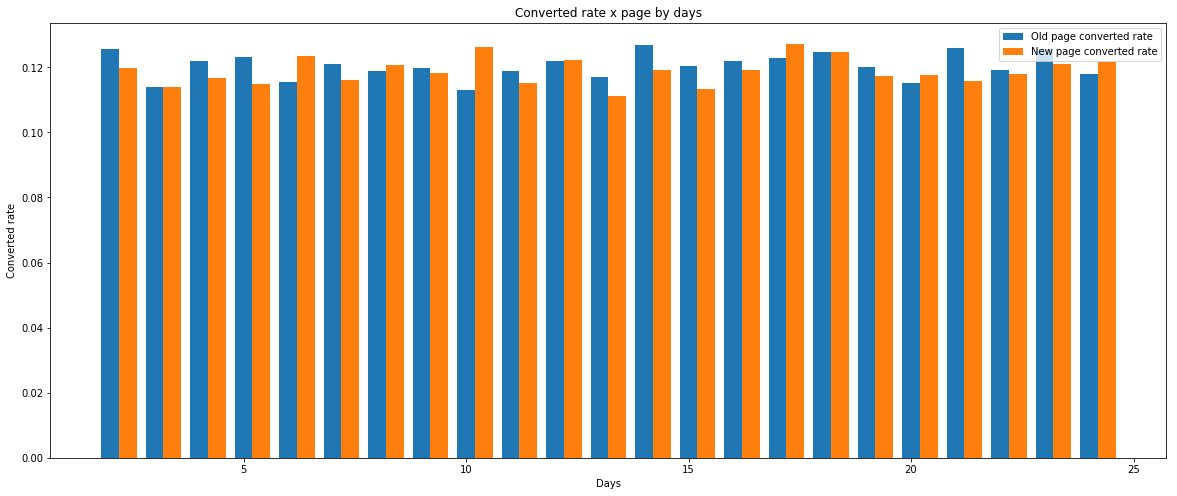

In [109]:
# Plotting the result from above
x = np.arange(2, 25)
plt.figure(figsize=(20,8))

width = 0.4

plt.bar(x, converted_control, width, label = 'Old page converted rate')
plt.bar(x+width, converted_treatment, width, label = 'New page converted rate')

plt.xlabel('Days')
plt.ylabel('Converted rate')
plt.title('Converted rate x page by days')
plt.legend(loc='best')
plt.show()

#### Analysis of the graph
According to the graph from above, there is not a significant impact of the days in our converted rate. 

I will analyze the significance impact through multiple regression for confirmation.

In [136]:
# Creating dummy variables for our day column
df5 = df4.copy()
df5 = pd.get_dummies(df5.day)
df5.head()

,2,3,4,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [137]:
# Adding the columns we will use for our analysis to our dataframe
df5['intercept'] =1
df5['converted'] = df4['converted']

In [138]:
df5.columns

Index([          2,           3,           4,           5,           6,
                 7,           8,           9,          10,          11,
                12,          13,          14,          15,          16,
                17,          18,          19,          20,          21,
                22,          23,          24, 'intercept', 'converted'],
      dtype='object')

In [140]:
model = sm.OLS(df5['converted'], df5[['intercept', 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.065
Date:                Sun, 01 Nov 2020   Prob (F-statistic):              0.377
Time:                        18:41:17   Log-Likelihood:                -85256.
No. Observations:              290584   AIC:                         1.706e+05
Df Residuals:                  290561   BIC:                         1.708e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1198      0.004     31.845      0.000       0.112       0.127
2              0.0029      0.006      0.505      0.613      -0.008       0.014
3             -0.0060      0.005     -1.285      0.199      -0.015       0.003
4             -0.0005      0.005     -0.116      0.908      -0.010       0.009
5             -0.0008      0.005     -0.160      0.873      -0.010       0.009
6             -0.0004      0.005     -0.083      0.934      -0.010       0.009
7             -0.0012      0.005     -0.264      0.792      -0.010       0.008
8          -2.087e-05      0.005     -0.004      0.996      -0.009       0.009
9             -0.0010      0.005     -0.207      0.836      -0.010       0.008
10            -0.0002      0.005     -0.045      0.964      -0.009       0.009
11            -0.0029      0.005     -0.608      0.543      -0.012       0.006
12             0.0024      0.005      0.501      0.616      -0.007       0.012
13            -0.0057      0.005     -1.220      0.223      -0.015       0.003
14             0.0031      0.005      0.668      0.504      -0.006       0.012
15            -0.0028      0.005     -0.600      0.548      -0.012       0.006
16             0.0007      0.005      0.142      0.887      -0.009       0.010
17             0.0052      0.005      1.106      0.269      -0.004       0.014
18             0.0050      0.005      1.053      0.292      -0.004       0.014
19            -0.0013      0.005     -0.267      0.790      -0.010       0.008
20            -0.0034      0.005     -0.715      0.475      -0.013       0.006
21             0.0011      0.005      0.225      0.822      -0.008       0.010
22            -0.0013      0.005     -0.267      0.789      -0.010       0.008
23             0.0035      0.005      0.754      0.451      -0.006       0.013
==============================================================================
Omnibus:                   125538.125   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414209.363
Skew:                           2.344   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         31.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusions:
As the summary confirms, any days has a significant effect in our converted rate.

Even though I could check the significant effect of interaction of day per page, i think I have evidence enough to fail the rejection of the null hypotheses. 

To make one more confirmation, I will check for multi collinearity among the day columns

In [121]:
# Checking for multilinearity
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
df5.rename(columns= {2:'d2', 3:'d3', 4:'d4', 5:'d5', 6:'d6', 7:'d7', 8:'d8', 9:'d9', 10:'d10', 11:'d11', 12:'d12', 13:'d13', 14:'d14', 15:'d15', 16:'d16', 17:'d17', 18:'d18', 19:'d19', 20:'d20', 21:'d21', 22:'d22', 23:'d23', 24:'d24'}, inplace=True) 
df5.head()

,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,...,d17,d18,d19,d20,d21,d22,d23,d24,intercept,converted
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [ ]:
s

In [133]:
# get y and X dataframes based on this regression:
y, X = dmatrices('converted ~ d2 + d3 + d4 + d5 + d6 + d7 + d8 + d10 + d11 + d12 + d13 + d14 + d15 + d16 + d17 + d18 + d19 + d20 + d21 + d22 + d23 + d24' , df5, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [134]:
vif

,VIF Factor,features
0,21.944117,Intercept
1,1.403219,d2
2,1.906643,d3
3,1.900837,d4
4,1.888625,d5
5,1.916093,d6
6,1.906969,d7
7,1.918307,d8
8,1.915897,d10
9,1.916614,d11


### Conclusions

Our VIF are below 10 and 5, so I can confirm I don't present multi collinearity in the day columns

## Final Conclusions:

Throughout this A/B test I failed to find evidence to reject the null hypotheses of both pages having the same converted rate.
So, I think there is not practical value on implementing the new page unless the implementation ends up on financial advantages for the company. 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [141]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

### References

* Z-test value: https://www.statisticshowto.com/z-test/
* Plot: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged